In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
true = pd.read_csv("True.csv")
false = pd.read_csv("Fake.csv")
true['category'] = 1
false['category'] = 0
df = pd.concat([true,false]) #Merging the 2 datasets

In [ ]:
df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
from nltk import pos_tag # function that tags words by their part of speech (POS)

In [ ]:
tagged_news_titles = df['title'].str.split().map(pos_tag)
tagged_news_titles.head()

0    [(As, IN), (U.S., NNP), (budget, NN), (fight, ...
1    [(U.S., NNP), (military, JJ), (to, TO), (accep...
2    [(Senior, JJ), (U.S., NNP), (Republican, NNP),...
3    [(FBI, NNP), (Russia, NNP), (probe, NN), (help...
4    [(Trump, NN), (wants, VBZ), (Postal, NNP), (Se...
Name: title, dtype: object

In [ ]:
def count_tags(title_with_tags):
    tag_count = {}
    for word, tag in title_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)
tagged_news_titles.map(count_tags).head()

0    {'IN': 1, 'NNP': 1, 'NN': 4, 'NNPS': 1, 'VBP':...
1    {'NNP': 3, 'JJ': 1, 'TO': 1, 'VB': 1, 'NN': 1,...
2    {'JJ': 1, 'NNP': 4, 'NN': 2, 'POS': 1, 'VB': 1...
3      {'NNP': 3, 'NN': 2, 'VBD': 1, 'IN': 1, 'JJ': 2}
4    {'NN': 2, 'VBZ': 1, 'NNP': 3, 'TO': 1, 'VB': 1...
Name: title, dtype: object

In [ ]:
tagged_news_titles = pd.DataFrame(tagged_news_titles)
tagged_news_titles['tag_counts'] = tagged_news_titles['title'].map(count_tags)
tagged_news_titles.head()

,title,tag_counts
0,"[(As, IN), (U.S., NNP), (budget, NN), (fight, ...","{'IN': 1, 'NNP': 1, 'NN': 4, 'NNPS': 1, 'VBP':..."
1,"[(U.S., NNP), (military, JJ), (to, TO), (accep...","{'NNP': 3, 'JJ': 1, 'TO': 1, 'VB': 1, 'NN': 1,..."
2,"[(Senior, JJ), (U.S., NNP), (Republican, NNP),...","{'JJ': 1, 'NNP': 4, 'NN': 2, 'POS': 1, 'VB': 1..."
3,"[(FBI, NNP), (Russia, NNP), (probe, NN), (help...","{'NNP': 3, 'NN': 2, 'VBD': 1, 'IN': 1, 'JJ': 2}"
4,"[(Trump, NN), (wants, VBZ), (Postal, NNP), (Se...","{'NN': 2, 'VBZ': 1, 'NNP': 3, 'TO': 1, 'VB': 1..."


<AxesSubplot:title={'center':'Frequency of POS Tags in News'}>

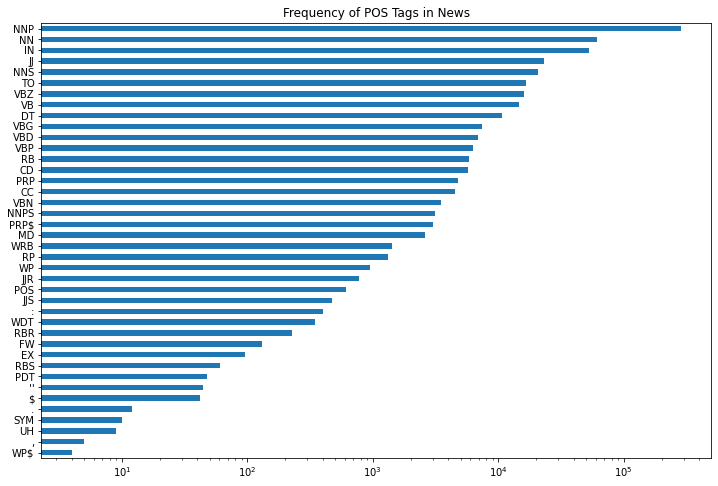

In [ ]:
# list of part-of-speech tags used in the Penn Treebank Project: 
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
tag_set = list(set([tag for tags in tagged_news_titles['tag_counts'] for tag in tags]))
for tag in tag_set:
    tagged_news_titles[tag] = tagged_news_titles['tag_counts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in News'    
tagged_news_titles[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

In [ ]:
vocabulary = {}
for row in tagged_news_titles['title']:
    for word, tag in row:
        if word in vocabulary:
            if tag in vocabulary[word]:
                vocabulary[word][tag] += 1
            else:
                vocabulary[word][tag] = 1
        else:
            vocabulary[word] = {tag: 1}
vocabulary_df = pd.DataFrame.from_dict(vocabulary, orient='index')
vocabulary_df.fillna(value=0, inplace=True)
tag = 'NNP' # NNP: Proper noun, singular 
vocabulary_df.sort_values(by=tag, ascending=False).head(10) # top 10 words for a given tag

,IN,NNP,RB,NN,VB,JJ,VBD,VBP,VBN,NNPS,...,WDT,WP,PDT,RBS,WP$,EX,UH,",",$,.
Trump,1.0,9203.0,4.0,860.0,93.0,9.0,0.0,21.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U.S.,0.0,4315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A,0.0,2248.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
House,0.0,1774.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Obama,0.0,1588.0,0.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
White,0.0,1410.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Trump’s,0.0,1314.0,0.0,4.0,8.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clinton,0.0,1142.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Just,0.0,1125.0,43.0,0.0,2.0,2.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hillary,0.0,1102.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:title={'center':'Top 25 Most Frequent Words for VBG Tag'}>

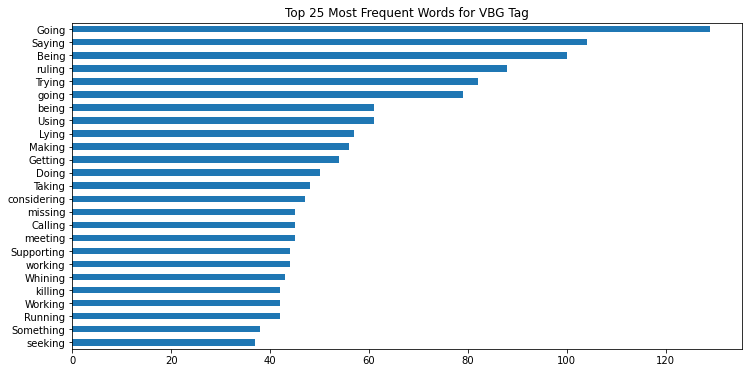

In [ ]:
size = 25
tag = 'VBG' # VBG: Verb, gerund or present participle
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
vocabulary_df[tag].sort_values().tail(size).plot(kind='barh', figsize=(12,6), title=title)

In [ ]:
size = 25
tag = 'NN' # VBG: Verb, gerund or present participle
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
vocabulary_df[tag].sort_values().tail(size).plot(kind='barh', figsize=(12,6), title=title)